<a href="https://colab.research.google.com/github/latifurrahmanalhamida/PCVK_244107027017_M-LATIFUR/blob/main/Modul_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M LATIFUR RAHMAN ALHAMIDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


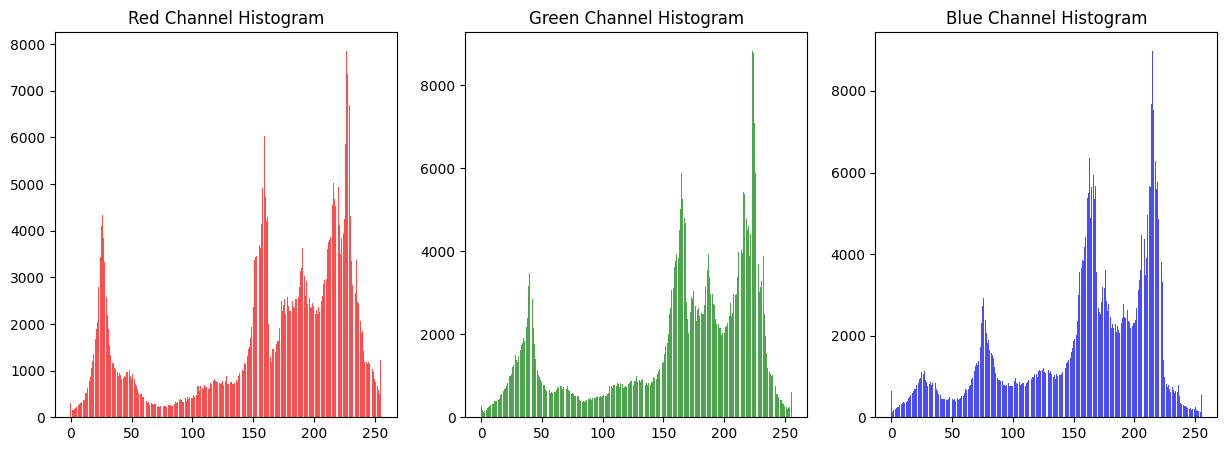

In [8]:
# #
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Define the load_image function using skimage.io.imread
def load_image(image_path):
    return io.imread(image_path)

# Load images
lena = load_image('/content/drive/MyDrive/pcvk/boneka.png')
lena_lc = load_image('/content/drive/MyDrive/pcvk/pasangan.jpg')

# Function to create histogram manually
def create_histogram_manual(image):
    # If image has alpha channel, remove it
    if image.shape[-1] == 4:
        image = image[..., :3]

    # Convert BGR to RGB if using OpenCV (handled by skimage here)
    image_rgb = image

    hist_r = np.zeros(256)
    hist_g = np.zeros(256)
    hist_b = np.zeros(256)

    # Calculate histogram manually
    for i in range(image_rgb.shape[0]):
        for j in range(image_rgb.shape[1]):
            hist_r[image_rgb[i, j, 0]] += 1
            hist_g[image_rgb[i, j, 1]] += 1
            hist_b[image_rgb[i, j, 2]] += 1

    # Plot histograms
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.bar(range(256), hist_r, color='red', alpha=0.7)
    plt.title('Red Channel Histogram')
    plt.subplot(132)
    plt.bar(range(256), hist_g, color='green', alpha=0.7)
    plt.title('Green Channel Histogram')
    plt.subplot(133)
    plt.bar(range(256), hist_b, color='blue', alpha=0.7)
    plt.title('Blue Channel Histogram')
    plt.show()

# Call the function to display the histogram of the image
create_histogram_manual(lena)


Tugas 4 : Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?


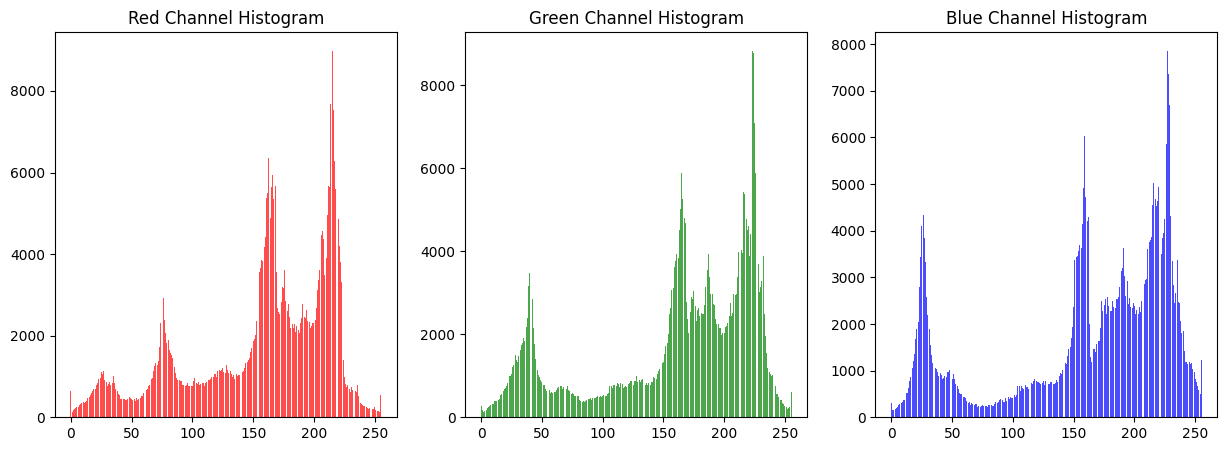

In [9]:
# 4
def create_histogram_numpy(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 5))
    for i, color in enumerate(['red', 'green', 'blue']):
        plt.subplot(1, 3, i+1)
        hist, bins = np.histogram(image_rgb[:,:,i].ravel(), 256, [0, 256])
        plt.bar(range(256), hist, color=color, alpha=0.7)
        plt.title(f'{color.capitalize()} Channel Histogram')
    plt.show()

print("Tugas 4 : Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?")
create_histogram_numpy(lena)



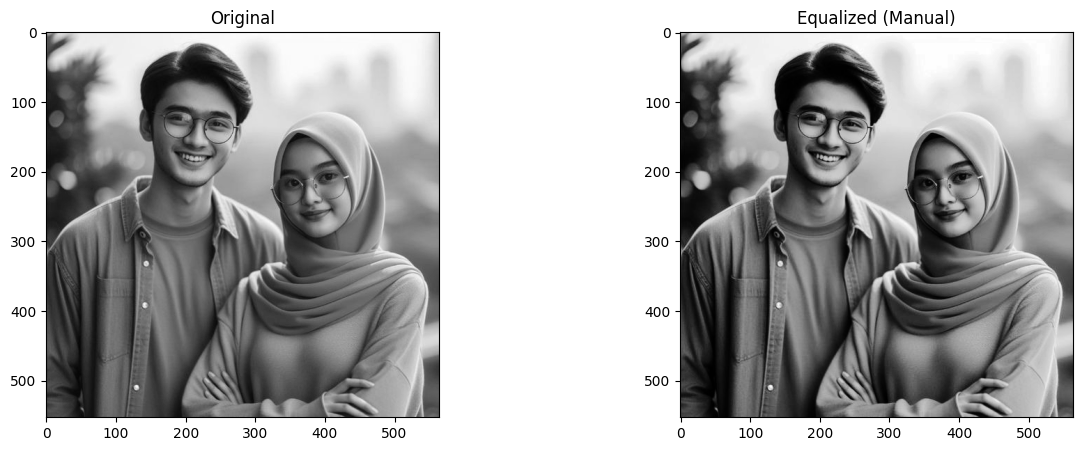

In [11]:
# 5
def histogram_equalization_manual(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    hist = np.zeros(256)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            hist[gray[i, j]] += 1

    cum_hist = np.cumsum(hist)

    cum_hist_normalized = cum_hist * 255 / cum_hist[-1]

    # Create lookup table
    lookup_table = np.round(cum_hist_normalized).astype('uint8')

    equalized = np.zeros_like(gray)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            equalized[i, j] = lookup_table[gray[i, j]]

    return equalized, gray
eq_manual, gray_manual = histogram_equalization_manual(lena_lc)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(gray_manual, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(eq_manual, cmap='gray')
plt.title('Equalized (Manual)')
plt.show()

Tugas 6 


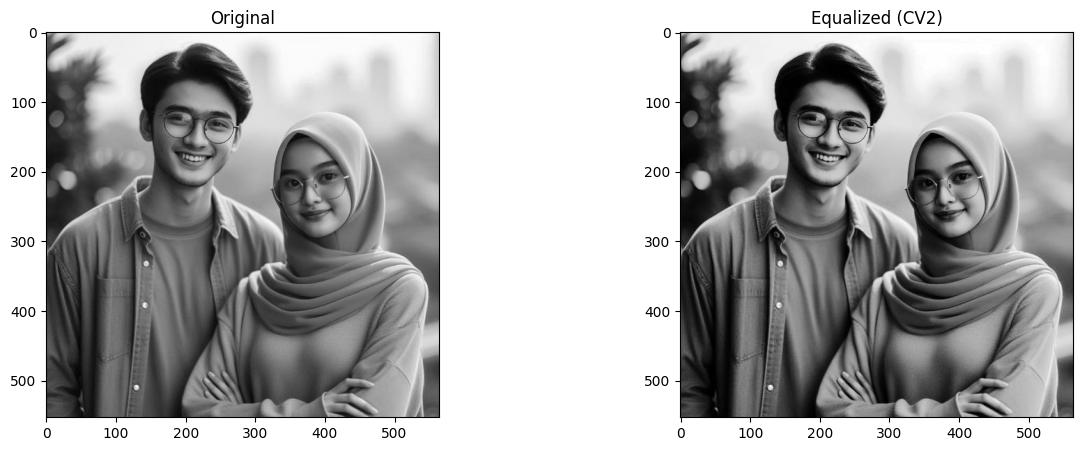

In [13]:
# 6
def histogram_equalization_cv2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    return equalized, gray

print("Tugas 6 ")
eq_cv2, gray_cv2 = histogram_equalization_cv2(lena_lc)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(gray_cv2, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(eq_cv2, cmap='gray')
plt.title('Equalized (CV2)')
plt.show()

In [ ]:
# 7
